# Домашнее задание 
# Математика — Домашнее задание 5
# А.&#8201;Д. Егоров<h1/>

In [1]:
import numpy as np
from scipy import stats as sts
from scipy import optimize
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
%matplotlib inline

## Задание


Необходимо выбрать вероятностное распределение на ваш выбор, кроме самых простых (нормальное, равномерное, биномиальное) и в Jupyter Notebook (можно Google Colab) провести следующие эксперименты:

1) Для выбранного распределения сгенерируйте выборки разного объема и проиллюстрируйте сходимость выборочного среднего к математическому ожиданию (покажите наглядно стабилизацию выборочного среднего).
2) Наглядно продемонстрируйте центральную предельную теорему в действии для выбранного вами распределения (покажите сходимость с ростом выборки к нормальному распределению).

Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте:

3) асимптотический доверительный интервал для среднего значения на базе ЦПТ
5) точный доверительный интервал для среднего значения
6) эфронов доверительный интервал для среднего, медианы, моды, дисперсии.

Представьте по пунктам 3-5 сводный датафрейм в читабельном формате и предоставьте вывод о ширинах ДИ, есть ли соответствие фактическому распределению, откуда взята выборка.

## Maxwell distribution

A special case of a $\chi$ distribution, with df=3, loc=0.0, and given scale = a.

The probability density function for maxwell is: 
$$
    f(x) = 
    \begin{cases}
        \sqrt{\dfrac{2}{\pi}} \ \ 
        \dfrac{ x^2 \ \mathrm{e}^{- {x^2}/{2 a^2} } } {a^3}, & x \geqslant 0, \\
        0, & x < 0
    \end{cases}
    \displaystyle
$$

The mean, variance are given by
\begin{gather*}
\mu = 2 a \sqrt{\dfrac{2}{\pi}}, \qquad 
\sigma^2 = \dfrac{a^2 (3 \pi - 8)}{\pi}
\end{gather*}

### Возьмем распределение Максвелла с параметром $a = \dfrac{1}{2}$:

In [2]:
a = 0.5
x = np.linspace(-0.1, 4, 1000)
maxwell_rv = sts.maxwell(scale=a)
pdf = maxwell_rv.pdf(x)

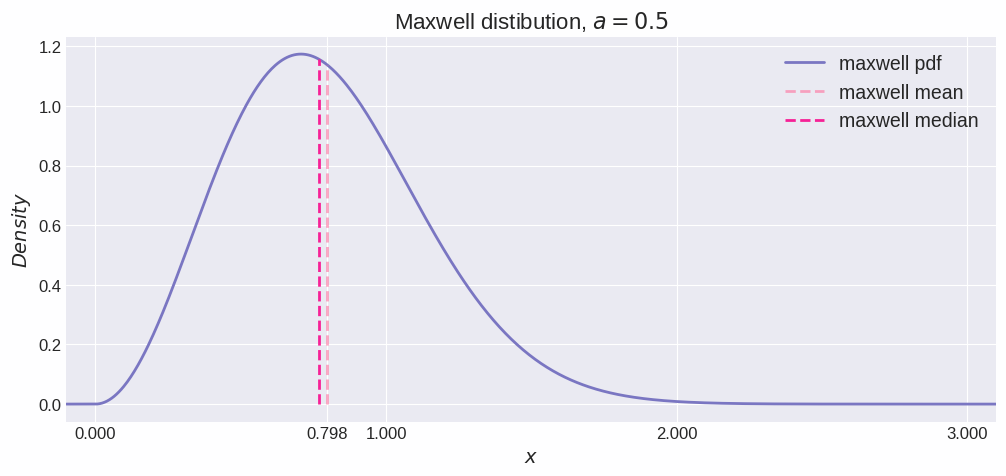

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(x, pdf, label="maxwell pdf", lw=2)

# mu = 2 * a * np.sqrt( 2 / np.pi)
mu = maxwell_rv.mean()
plt.plot([mu] * 2, [0, maxwell_rv.pdf(mu)], ls="dashed", lw=2, label="maxwell mean")
median = maxwell_rv.median()
plt.plot(
    [median] * 2, [0, maxwell_rv.pdf(median)], ls="dashed", lw=2, label="maxwell median"
)

plt.title("Maxwell distibution, $a = 0.5$", fontsize=16)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$Density$", fontsize=14)
plt.xticks([round(x, 3) for x in (list(plt.xticks()[0]) + [mu])])
plt.xlim((-0.1, 3.1))
plt.tick_params(axis="both", labelsize=12)
plt.legend(fontsize=14)

plt.show()

## Иллюстрация сходимости выборочного среднего к математическому ожиданию распределения Максвелла

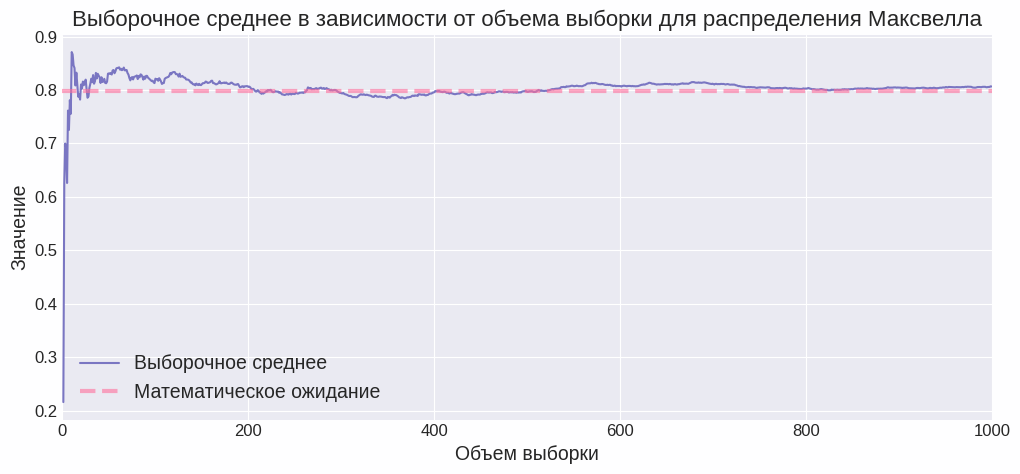

In [4]:
plt.figure(figsize=(12, 5))

samples_vol = 1000
x = [i for i in range(1, samples_vol)]
samples = maxwell_rv.rvs(size=samples_vol)
samples_avg = []
for i in range(1, samples_vol):
    samples_avg.append(np.average(samples[0:i]))


plt.plot(x, samples_avg, lw=1.5, label="Выборочное среднее")
plt.plot(
    [i for i in range(-100, 1100)],
    [maxwell_rv.mean()] * 1200,
    lw=3,
    ls="dashed",
    label="Математическое ожидание",
)

plt.xlim((0, 1000))
plt.title(
    "Выборочное среднее в зависимости от объема выборки для распределения Максвелла",
    fontsize=16,
)
plt.xlabel("Объем выборки", fontsize=14)
plt.ylabel("Значение", fontsize=14)
plt.tick_params(axis="both", labelsize=12)
plt.legend(fontsize=14)

plt.show()

## Иллюстрация действия ЦПТ для распределения Максвелла

Генерируем выборки

In [5]:
n_obs = 100
samples_vol = 500

samples = maxwell_rv.rvs(size=(n_obs, samples_vol))  # генерируем 100 выборок объема 500

Построим гистограммы

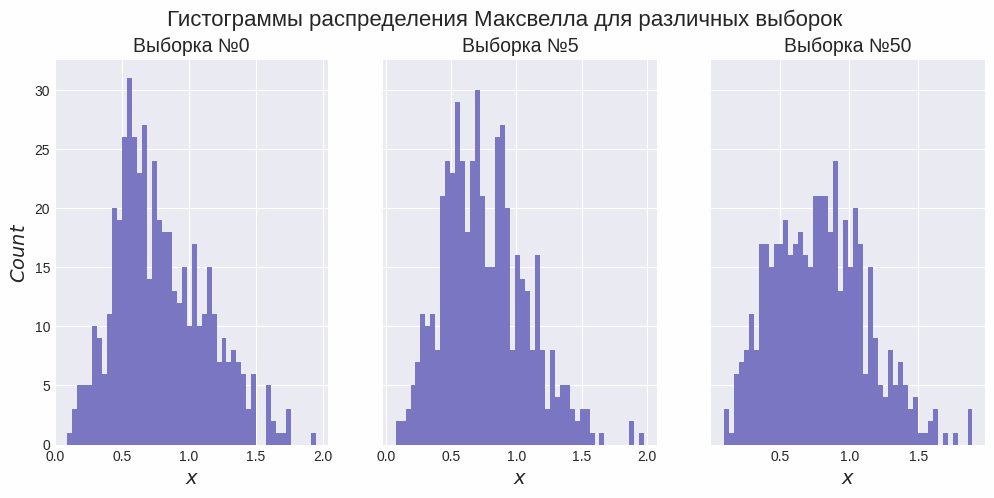

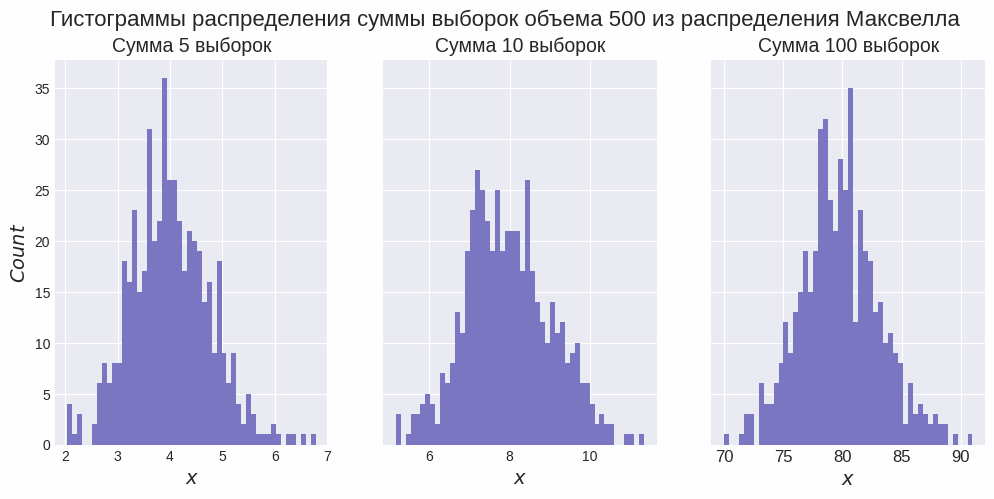

In [6]:
"""
    Гистограммы распределения Максвелла
"""
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
fig.suptitle("Гистограммы распределения Максвелла для различных выборок", fontsize=16)

for i, j in enumerate([0, 5, 50]):
    axs[i].hist(samples[j], bins=50)
    axs[i].set_title(f"Выборка №{j}", fontsize=14)
    axs[i].set_xlabel("$x$", fontsize=14)

axs[0].set_ylabel("$Count$", fontsize=14)

plt.show()

"""
    Гистограммы распределения сумм
"""
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
fig.suptitle(
    f"Гистограммы распределения суммы выборок объема {samples_vol} из распределения Максвелла",
    fontsize=16,
)

for i, j in enumerate([5, 10, 100]):
    axs[i].hist(sum(samples[0:j]), bins=50)
    axs[i].set_title(f"Сумма {j} выборок", fontsize=14)
    axs[i].set_xlabel("$x$", fontsize=14)

axs[0].set_ylabel("$Count$", fontsize=14)

plt.tick_params(axis="both", labelsize=12)

plt.show()

Сравним гистограмму распределения суммы 100 выборок объема 500 из распределения Максвелла с гистограммой выборки из нормального распределения объемом 500.

Воспользуемся ЦПТ для выборок из распределения Максвелла: возьмем следующуя случайную величину:
$$
    X = 
    \dfrac{\sum_{j = 0}^{n} X_j - \mu n}{\sigma \sqrt n},
    \displaystyle
$$
где $X_j$ — случайные величины распределенные по закону Максвелла, $\mu,\ \sigma$ — мат. ожидание и дисперсия распределения Максвелла, $n$ — число наблюдений.
Из ЦПТ: 
$
    X \rightarrow N(0, 1)
$
по распределению при $n \rightarrow \infty$.


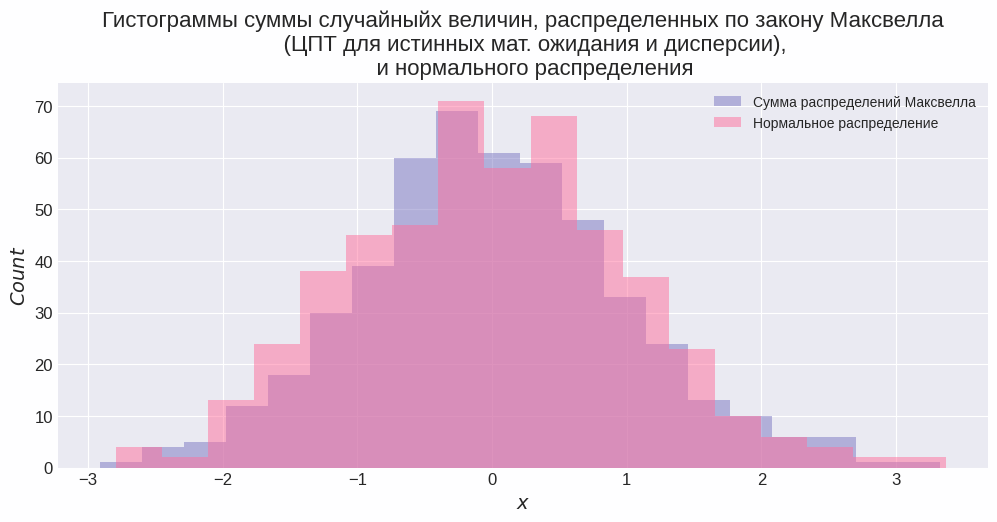

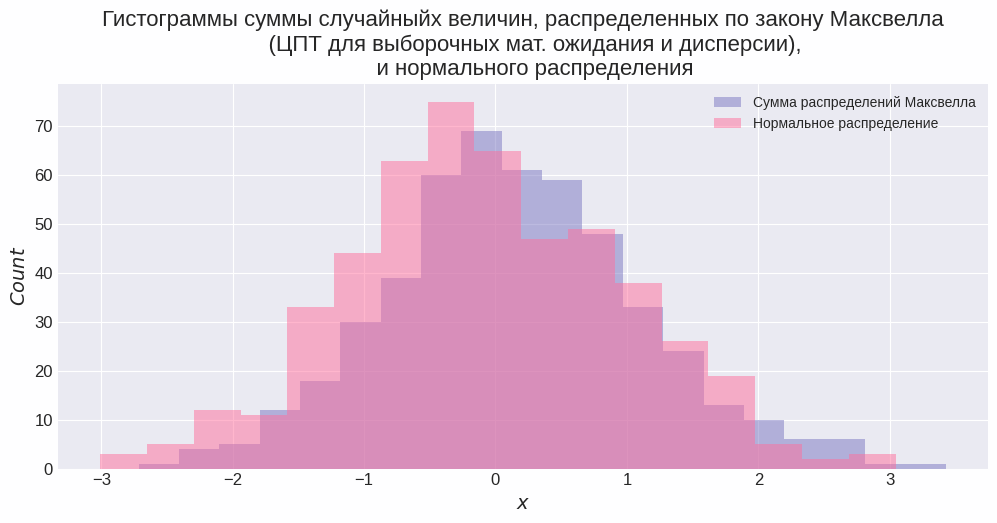

In [7]:
"""
    Для истинных мат. ожидания и дисперсии
"""
plt.figure(figsize=(12, 5))

X = (sum(samples) - maxwell_rv.mean() * n_obs) / np.sqrt(maxwell_rv.var() * n_obs)

plt.hist(
    X,
    bins="auto",
    density=False,
    histtype="stepfilled",
    alpha=0.5,
    label="Сумма распределений Максвелла",
)
norm_rv = sts.norm(loc=0, scale=1)
plt.hist(
    norm_rv.rvs(500),
    bins="auto",
    density=False,
    histtype="stepfilled",
    alpha=0.5,
    label="Нормальное распределение",
)

plt.title(
    """Гистограммы суммы случайныйх величин, распределенных по закону Максвелла
    (ЦПТ для истинных мат. ожидания и дисперсии),
    и нормального распределения""",
    fontsize=16,
)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$Count$", fontsize=14)
plt.legend()
plt.tick_params(axis="both", labelsize=12)
plt.show()


"""
    Для выборочных мат. ожидания и дисперсии
"""
plt.figure(figsize=(12, 5))

X = (sum(samples) - np.mean(samples[0]) * n_obs) / np.sqrt(np.var(samples[0]) * n_obs)

plt.hist(
    X,
    bins="auto",
    density=False,
    histtype="stepfilled",
    alpha=0.5,
    label="Сумма распределений Максвелла",
)
norm_rv = sts.norm(loc=0, scale=1)
plt.hist(
    norm_rv.rvs(500),
    bins="auto",
    density=False,
    histtype="stepfilled",
    alpha=0.5,
    label="Нормальное распределение",
)

plt.title(
    """Гистограммы суммы случайныйх величин, распределенных по закону Максвелла
    (ЦПТ для выборочных мат. ожидания и дисперсии),
    и нормального распределения""",
    fontsize=16,
)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$Count$", fontsize=14)
plt.legend()
plt.tick_params(axis="both", labelsize=12)
plt.show()

## Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте:

In [8]:
# генерируем выборки разных разменов (маленький/средний/большой)
X_S = maxwell_rv.rvs(size=100)
X_M = maxwell_rv.rvs(size=500)
X_L = maxwell_rv.rvs(size=1500)

In [9]:
# Список для данных под датафрейм
data_CI = []


### 3) асимптотический доверительный интервал для среднего значения на базе ЦПТ


In [10]:
def norm_conf_int(alpha, X):
    """
    Асимптотический доверительный интервал
    """

    mu_hat = np.mean(X)
    var_hat = np.var(X)
    n = len(X)

    z_rv = sts.norm(loc=mu_hat, scale=var_hat / n)
    z_crit = z_rv.ppf(1 - alpha / 2)

    left = mu_hat - z_crit * np.sqrt(var_hat / n)
    right = mu_hat + z_crit * np.sqrt(var_hat / n)

    return left, right

In [11]:
for X_name, X in zip(("X_S", "X_M", "X_L"), (X_S, X_M, X_L)):
    data_CI.append(
        [
            "Асимптотический",
            "mean",
            X_name,
            [round(x, 4) for x in norm_conf_int(0.05, X)],
        ]
    )

### 5) точный доверительный интервал для среднего значения


In [12]:
def t_conf_int(alpha, X):
    """
    Точный доверительный интервал
    """

    mu_hat = np.mean(X)
    var_hat = np.var(X)
    n = len(X)

    t_rv = sts.t(df=n - 1)
    t_crit = t_rv.ppf(1 - alpha / 2)

    left = mu_hat - t_crit * np.sqrt(var_hat / n)
    right = mu_hat + t_crit * np.sqrt(var_hat / n)

    return left, right

In [13]:
for X_name, X in zip(("X_S", "X_M", "X_L"), (X_S, X_M, X_L)):
    data_CI.append(
        ["Точный", "mean", X_name, [round(x, 4) for x in t_conf_int(0.05, X)]]
    )

### 6) эфронов доверительный интервал для среднего, медианы, моды, дисперсии.


In [14]:
def calc_minimize_mode(data):
    """
        Функция для нахождения моды по выборке [x1, ..., xn]
    """
    distribution = sts.gaussian_kde(data)
    def minimized_func(x):
        return - distribution.pdf(x)[0]
    bnds = [(min(data), max(data))]
    solution = optimize.minimize(fun=minimized_func, x0=np.random.choice(data), bounds = bnds)
    return solution.x[0]

In [15]:
for X_name, X in zip(("X_S", "X_M", "X_L"), (X_S, X_M, X_L)):
    X_mean = []
    X_var = []
    X_median = []
    X_mode = []
    for _ in range(len(X)):
        tmp = np.random.choice(X, size=len(X), replace=True)
        X_mean.append(np.mean(tmp))
        X_var.append(np.var(tmp))
        X_median.append(np.median(tmp))
        X_mode.append(calc_minimize_mode(tmp))

    for CI_for, CI in zip(
        ("mean", "var", "median", "mode"), 
        (X_mean, X_var, X_median, X_mode)
    ):
        data_CI.append(
            ["Эфронов", CI_for, X_name, [round(x, 4) for x in np.percentile(CI, q=[2.5, 97.5])]]
        )

Создадим датафрейм

In [16]:
df_CI = pd.DataFrame(data_CI, columns=["CI_type", "CI_for", "Sampling", "CI_vals"])
df_CI["CI_len"] = df_CI["CI_vals"].agg(lambda x: x[1] - x[0])

Истиные значения для распределения Максвелла $a = 0.5$: 
\begin{gather*}
    mean = 0.7978845608028654, \\
    var = 0.11338022763241862, \\
    median = 0.7690861272275261, \\
    mode = 0.7071107071107071, \\
\end{gather*}


Отсортированные значения в зависимости от размера выборки

In [17]:
df_CI.sort_values(by=["Sampling", "CI_for"], ascending=False)

,CI_type,CI_for,Sampling,CI_vals,CI_len
7,Эфронов,var,X_S,"[0.0923, 0.1597]",0.0674
9,Эфронов,mode,X_S,"[0.5734, 0.9339]",0.3605
8,Эфронов,median,X_S,"[0.7508, 0.8835]",0.1327
0,Асимптотический,mean,X_S,"[0.8228, 0.8836]",0.0608
3,Точный,mean,X_S,"[0.7827, 0.9238]",0.1411
6,Эфронов,mean,X_S,"[0.788, 0.9196]",0.1316
11,Эфронов,var,X_M,"[0.0913, 0.1168]",0.0255
13,Эфронов,mode,X_M,"[0.6259, 0.8533]",0.2274
12,Эфронов,median,X_M,"[0.7415, 0.8009]",0.0594
1,Асимптотический,mean,X_M,"[0.7869, 0.81]",0.0231


Отсортированные значения в зависимости от типа значения, для котогоро строился интервал

In [18]:
df_CI.sort_values(by=["CI_for", "Sampling"], ascending=True)

,CI_type,CI_for,Sampling,CI_vals,CI_len
2,Асимптотический,mean,X_L,"[0.79, 0.8036]",0.0136
5,Точный,mean,X_L,"[0.78, 0.8136]",0.0336
14,Эфронов,mean,X_L,"[0.7804, 0.8139]",0.0335
1,Асимптотический,mean,X_M,"[0.7869, 0.81]",0.0231
4,Точный,mean,X_M,"[0.77, 0.8269]",0.0569
10,Эфронов,mean,X_M,"[0.7713, 0.8268]",0.0555
0,Асимптотический,mean,X_S,"[0.8228, 0.8836]",0.0608
3,Точный,mean,X_S,"[0.7827, 0.9238]",0.1411
6,Эфронов,mean,X_S,"[0.788, 0.9196]",0.1316
16,Эфронов,median,X_L,"[0.7536, 0.7881]",0.0345


## Вывод

Истинные значения параметров для распределения Максвелла попадают в построенные доверительные интервалы.

В дополнение можно сказать про длины итервалов, что
асимптотический ДИ уже точного и эфронового, 
длины которых примерно одинаковы.